In [25]:
# Importing few libraries
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
DATASET = r'D:/probleme_asc/2750'

LABELS = os.listdir(DATASET)
print(LABELS)


['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


                                          image_path       label
0   D:/probleme_asc/2750\AnnualCrop\AnnualCrop_1.jpg  AnnualCrop
1  D:/probleme_asc/2750\AnnualCrop\AnnualCrop_10.jpg  AnnualCrop
2  D:/probleme_asc/2750\AnnualCrop\AnnualCrop_100...  AnnualCrop
3  D:/probleme_asc/2750\AnnualCrop\AnnualCrop_100...  AnnualCrop
4  D:/probleme_asc/2750\AnnualCrop\AnnualCrop_100...  AnnualCrop


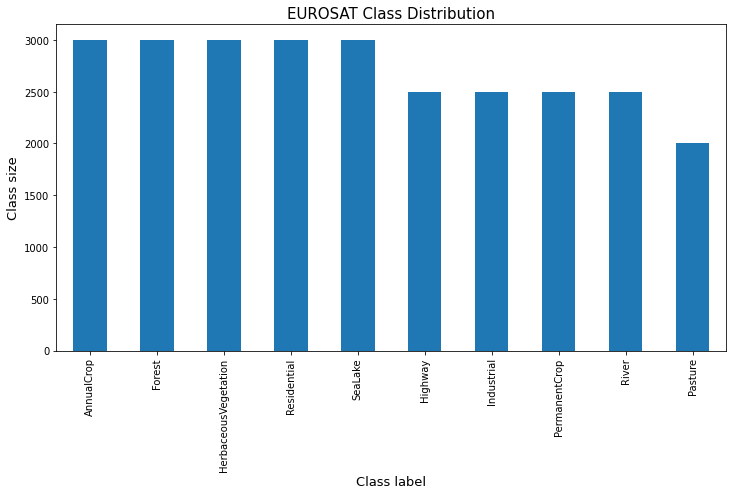

In [27]:
import os
import pandas as pd
from tqdm import tqdm
import PIL
import numpy as np
import matplotlib.pyplot as plt

# Assuming LABELS and DATASET are defined somewhere in your code

# Create a list to store file paths and labels
data = []

for label in LABELS:
    img_folder = os.path.join(DATASET, label)
    img_paths = [os.path.join(img_folder, img) for img in os.listdir(img_folder) if img.endswith('.jpg')]
    
    # Append file paths and labels to the data list
    data.extend([(img_path, label) for img_path in img_paths])

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['image_path', 'label'])

# Save the DataFrame to a CSV file
csv_filename = 'dataset.csv'
df.to_csv(csv_filename, index=False)

# Display the first few rows of the DataFrame
print(df.head())

# Plotting the class distribution
plt.figure(figsize=(12, 6))
df['label'].value_counts().plot(kind='bar')
plt.xlabel('Class label', fontsize=13)
plt.ylabel('Class size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15)
plt.show()

In [28]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from skimage import io
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.image as mpimg
# Assuming you have the Eurosat dataset loaded and class labels available
DATASET = r'D:/probleme_asc/2750'
LABELS = os.listdir(DATASET)

# Load textual descriptions for each image
text_descriptions = []

for label in LABELS:
    label_path = os.path.join(DATASET, label)
    for image_file in os.listdir(label_path):
        text_descriptions.append(f"{label} image")

# Create a dictionary mapping image paths to their textual descriptions
image_to_text_mapping = {os.path.join(DATASET, label, image_file): f"{label} image" 
                         for label in LABELS 
                         
                         for image_file in os.listdir(os.path.join(DATASET, label))}

# Extract features for the image modality
def extract_image_features(image_paths):
    features = []
    for path in image_paths:
        img = io.imread(path)
        # Use histogram features for simplicity
        feature_vector = np.histogram(img.ravel(), bins=256, range=[0, 256])[0]
        features.append(feature_vector)
    return np.array(features)


In [29]:
# Normalize the features
text_embeddings_normalized = normalize(text_embeddings, axis=1, norm='l2')

# Extract features for the image modality
image_paths = list(image_to_text_mapping.keys())
image_features = extract_image_features(image_paths)

# Extract features for the text modality
vectorizer = TfidfVectorizer()
text_embeddings = vectorizer.fit_transform(text_descriptions).toarray()


In [30]:
# Perform multimodal search
def multimodal_search(query_image_path, query_text, image_to_text_mapping, 
                      image_features, text_embeddings_normalized, top_k=5):
    # Extract features for the query image
    query_image_features = extract_image_features([query_image_path])
    query_image_features_normalized = normalize(query_image_features.reshape(1, -1), norm='l2')

    # Extract features for the query text
    query_text_embedding = vectorizer.transform([query_text]).toarray()
    query_text_embedding_normalized = normalize(query_text_embedding, norm='l2')

    # Compute cosine similarities
    image_similarity = cosine_similarity(query_image_features_normalized, image_features).flatten()
    text_similarity = cosine_similarity(query_text_embedding_normalized, text_embeddings_normalized).flatten()

    # Combine similarities
    combined_similarity = 0.7 * image_similarity + 0.3 * text_similarity

    # Find top matches
    top_matches_indices = np.argsort(combined_similarity)[::-1][:top_k]

    # Display top matches
    for i, index in enumerate(top_matches_indices):
        matched_image_path = list(image_to_text_mapping.keys())[index]
        matched_text_description = list(image_to_text_mapping.values())[index]
        print(f"Match {i + 1}:")
        print("Image Path:", matched_image_path)
        print("Text Description:", matched_text_description)
        print("Combined Similarity:", combined_similarity[index])
        print()
    
   # Display top matches with larger images
    num_rows = 2
    num_cols = (top_k + 1) // num_rows

    plt.figure(figsize=(15, 8))
    for i, index in enumerate(top_matches_indices):
        matched_image_path = list(image_to_text_mapping.keys())[index]
        matched_text_description = list(image_to_text_mapping.values())[index]
        similarity_score = combined_similarity[index]

        # Plot the matched image
        plt.subplot(num_rows, num_cols, i + 1)
        img = mpimg.imread(matched_image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Match {i + 1}\nScore: {similarity_score:.2f}\nDescription: {matched_text_description}")

    # Plot the query image separately
    plt.subplot(num_rows, num_cols, num_cols * num_rows)
    query_img = mpimg.imread(query_image_path)
    plt.imshow(query_img)
    plt.axis('off')
    plt.title("Query Image")

    # Adjust layout to prevent overlapping titles
    plt.tight_layout()
    
    # Show the plot
    plt.show()


Match 1:
Image Path: D:/probleme_asc/2750\SeaLake\SeaLake_37.jpg
Text Description: SeaLake image
Combined Similarity: 0.7000000000000001

Match 2:
Image Path: D:/probleme_asc/2750\SeaLake\SeaLake_2972.jpg
Text Description: SeaLake image
Combined Similarity: 0.6728082524341467

Match 3:
Image Path: D:/probleme_asc/2750\SeaLake\SeaLake_48.jpg
Text Description: SeaLake image
Combined Similarity: 0.643975596054195

Match 4:
Image Path: D:/probleme_asc/2750\SeaLake\SeaLake_1738.jpg
Text Description: SeaLake image
Combined Similarity: 0.6333665398950004

Match 5:
Image Path: D:/probleme_asc/2750\River\River_854.jpg
Text Description: River image
Combined Similarity: 0.6229652028387135



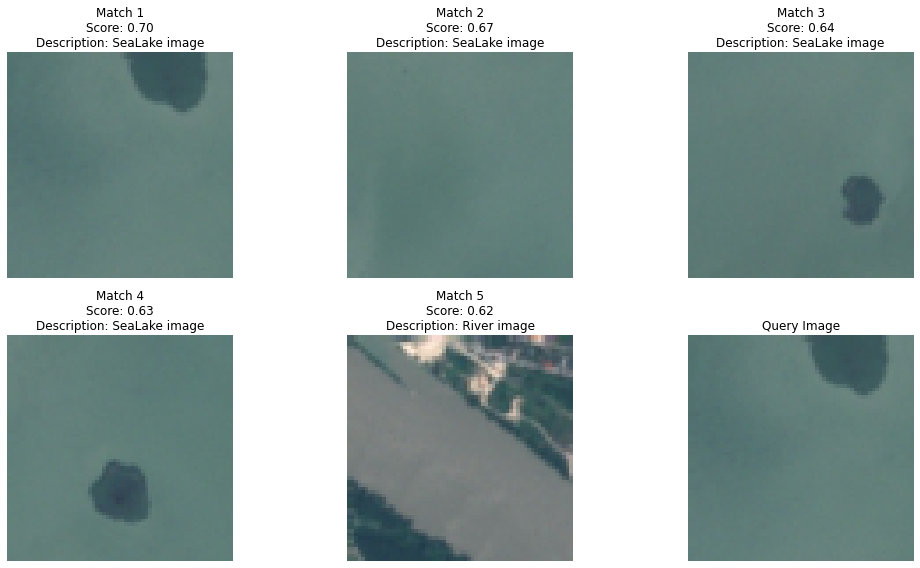

In [31]:
# Example usage
query_image_path = r'D:\probleme_asc\2750\SeaLake\SeaLake_37.jpg'
query_text = "Landscape with lakes and seas"

multimodal_search(query_image_path, query_text, image_to_text_mapping, image_features, text_embeddings_normalized)

Match 1:
Image Path: D:/probleme_asc/2750\AnnualCrop\AnnualCrop_1.jpg
Text Description: AnnualCrop image
Combined Similarity: 0.7

Match 2:
Image Path: D:/probleme_asc/2750\PermanentCrop\PermanentCrop_751.jpg
Text Description: PermanentCrop image
Combined Similarity: 0.6935916153132847

Match 3:
Image Path: D:/probleme_asc/2750\PermanentCrop\PermanentCrop_881.jpg
Text Description: PermanentCrop image
Combined Similarity: 0.6901297268381072

Match 4:
Image Path: D:/probleme_asc/2750\PermanentCrop\PermanentCrop_1909.jpg
Text Description: PermanentCrop image
Combined Similarity: 0.6893514743857526

Match 5:
Image Path: D:/probleme_asc/2750\PermanentCrop\PermanentCrop_1675.jpg
Text Description: PermanentCrop image
Combined Similarity: 0.689237966970818



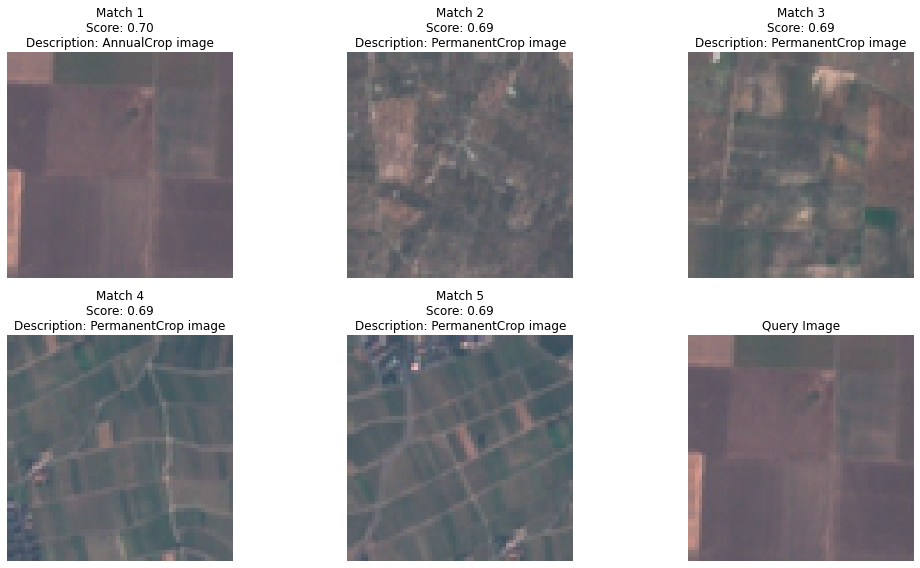

In [32]:
# Another Example usage
query_image_path = r'D:\probleme_asc\2750\AnnualCrop\AnnualCrop_1.jpg'
query_text = "Agricultural land with crops"

multimodal_search(query_image_path, query_text, image_to_text_mapping, image_features, text_embeddings_normalized)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a dataset with class labels and multimodal features
# Concatenate image features and text features to form the multimodal feature set
multimodal_features = np.concatenate((image_features, text_embeddings_normalized), axis=1)

# Create labels for each sample based on the class labels in the dataset
labels = [os.path.basename(os.path.dirname(image_path)) for image_path in image_paths]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(multimodal_features, labels, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, digits=4)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report_result)


Accuracy: 0.9998
Classification Report:
                       precision    recall  f1-score   support

          AnnualCrop     1.0000    0.9983    0.9992       595
              Forest     1.0000    1.0000    1.0000       606
HerbaceousVegetation     1.0000    1.0000    1.0000       602
             Highway     1.0000    1.0000    1.0000       515
          Industrial     1.0000    1.0000    1.0000       493
             Pasture     1.0000    1.0000    1.0000       423
       PermanentCrop     1.0000    1.0000    1.0000       473
         Residential     0.9983    1.0000    0.9992       597
               River     1.0000    1.0000    1.0000       490
             SeaLake     1.0000    1.0000    1.0000       606

            accuracy                         0.9998      5400
           macro avg     0.9998    0.9998    0.9998      5400
        weighted avg     0.9998    0.9998    0.9998      5400



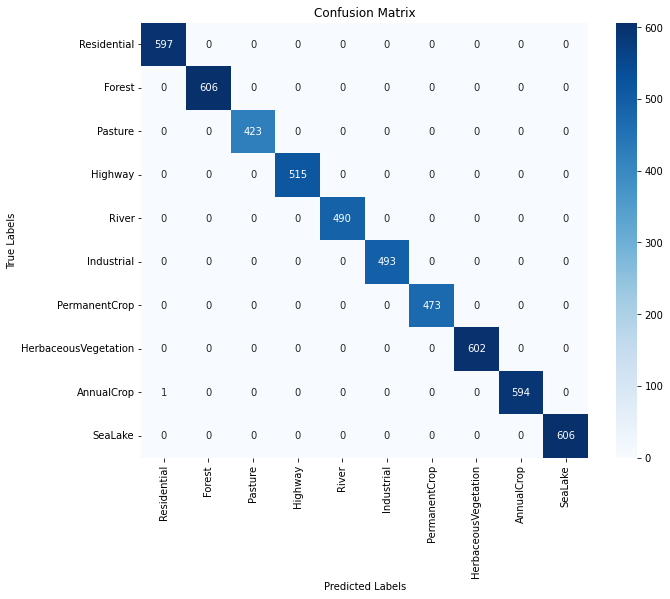

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    
    # Save the figure
    plt.savefig("Confusion_Matrix")
    
    plt.show()

# Assuming class_labels is a list containing unique class labels
class_labels = list(set(labels))

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, class_labels)
